In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, LatentDirichletAllocation
from pprint import pprint
from time import time
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
# import keras
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8


%matplotlib inline
sns.set()
print("Finished!")


Finished!


## Import and clean the data for topic modelling

In [122]:
df_main = pd.read_excel("depression.xlsx")
df_main.head()

,Comments Text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...


In [123]:
# Issue is we can not just model by topic we need to classify ..... 
# What happens if we use not depressed  ? 
df_main.isnull().sum()

Comments Text    0
dtype: int64

In [124]:
df_main.head()

,Comments Text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...


General steps to be taken for cleaning data..............
Remove URLs
Remove emails
Lowercase all text
Remove punctuation signs
Remove stop words
Lemmatize text

In [125]:
#Removing URLs with a regular expression
def clean_comments(comment: str):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_removed =  url_pattern.sub(r'', comment)
    at_removed = re.sub('\S*@\S*\s?', '', url_removed)
    new_line_removed = re.sub('\s+', ' ', at_removed)
    quote_removed = re.sub("\'", "", new_line_removed)
    return quote_removed

df_main["Comments Text"] = df_main["Comments Text"].apply(clean_comments)

In [126]:
df_main.head()

,Comments Text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...


## Visualizing the first comment to see what it looks like 

In [127]:
df_main["Comments Text"][0]

'So, when you ask what the two illnesses are...theyre similar in that they tend to have moodiness involved, impulsivity and self-damaging behaviors for compensatory measures. Otherwise, theyre not really that similar, but they do seem to "like" one another and often show up in the same person...making their lives chaotic, difficult, dysfunctional, and intense. So, if your friend is concerned that they may have one (or both) of these illnesses, they should not be ashamed. Its definitely not their fault. They should, instead, get help from a professional...and INSIST that they are treated appropriately with the correct types of therapy and medication.'

In [128]:
len(df_main)

7145

## Start of topic modelling 

First we do vectorization and then we use NMF  for topic modelling. 

In [130]:
tfidvector = TfidfVectorizer( min_df=0.05, stop_words="english")

In [131]:
tfidf_matrix = tfidvector.fit_transform(df_main["Comments Text"])

In [132]:
tfidf_matrix

<7145x68 sparse matrix of type '<class 'numpy.float64'>'
	with 48375 stored elements in Compressed Sparse Row format>

In [133]:
no_of_topics = 2
nmf_model = NMF(n_components=no_of_topics)

In [134]:
nmf_model.fit(tfidf_matrix)

NMF(n_components=2)

In [135]:
len(tfidvector.get_feature_names())

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


68

In [136]:
for index, topic in enumerate(nmf_model.components_):
    print(topic)

[0.         0.45949885 0.4924374  0.67182178 0.48526272 0.36811057
 0.82102488 0.41181765 0.23807703 0.37863069 0.35347948 0.36746307
 0.23370181 0.4382329  0.37245787 1.65312616 0.38583053 1.25248722
 0.46425797 0.73251831 0.81351336 0.4374257  0.57081009 0.39291697
 1.18624016 0.30785967 0.41803434 0.41189258 0.44557016 2.31181377
 0.89846281 1.72062072 1.16322243 0.38643249 0.93097205 1.24806478
 0.42004251 0.479772   0.62819133 0.40967937 1.01170683 0.55874284
 0.89404632 0.2322412  1.06548175 0.39074567 0.75948199 0.60897228
 0.48801191 0.31757174 0.50662607 0.40824923 0.49392035 0.41982659
 0.46216658 0.45729599 0.71910121 0.73507502 0.98843728 0.42585251
 0.67734627 0.51858562 0.70659029 0.63069107 0.61305466 0.69026894
 0.31572536 0.42952251]
[3.77016318e+00 1.25168170e-01 3.13757561e-02 6.99023364e-03
 9.37697456e-01 0.00000000e+00 6.06952748e-02 3.81392187e-02
 1.62418039e+00 4.79657901e-02 6.80708874e-02 7.61359964e-02
 4.14973488e-01 7.96368052e-02 2.87070440e-02 0.00000000

In [137]:
for index, topic in enumerate(nmf_model.components_):
    print(f"Top 5 words for topic {index}")
    print([tfidvector.get_feature_names()[i] for i in topic.argsort()[-10:]])

Top 5 words for topic 0
['time', 'meds', 'people', 'know', 'help', 'like', 'feel', 'dont', 'just', 'im']
Top 5 words for topic 1
['years', 'sleep', 'medication', 'helps', 'meds', 'panic', 'disorder', 'bipolar', 'depression', 'anxiety']


In [138]:
topic_results = nmf_model.transform(tfidf_matrix)
topic_results

array([[0.04473459, 0.00478087],
       [0.08199283, 0.00330817],
       [0.07671392, 0.00239955],
       ...,
       [0.        , 0.        ],
       [0.02075811, 0.10072067],
       [0.0159686 , 0.11553178]])

In [139]:
topic_results.argmax(axis=1)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [140]:
df_main["label"] = topic_results.argmax(axis=1)

In [141]:
i = 5
limit = 10
for a in df_main.index:
    
    try:
        print(df_main[df_main["label"] == 0].loc[i, "Comments Text"])
        print("\n")
    except KeyError:
        limit += 1
    i += 1
    if i == limit:
        break


Believe me, I show you much more than anyone. I still have lots of work to do but I trust you completely. I hope you feel the same. You can share anything with me Li, no worries.


Yes, I feel the exact same way. My family avoids me all ways/always now. I have no place in my family and no voice either. I now choose not to give them any info if at all possible. All they do now is hurt me and leave me out of all family functions and matters because I am not strong enough. This is the time you find your true family and friends. Facebook has helped me tremendously. I will not validate their behavior because it is so stereotypical. They choose to remain ignorant.


I was hospitalized in May for the same reason. Ive dealt with the loneliness that comes with it. Unless you know someone who has struggled with it, its really hard for others to relate. Problem is, it adds to the emotional mudslide that plagues us. I completely understand where you are coming from.


I feel like that and im heari

In [142]:
i = 15
limit = 20
for a in df_main.index:
    try:
        print(df_main[df_main["label"] == 1].loc[i, "Comments Text"])
        print("\n")
    except KeyError:
        limit += 1
    i += 1
    if i == limit:
        break


Im a *itch 24/7 and I am not on medication because I have no fking medical insurance for my bipolar, depression and anxiety so I have too deal with it myself and people around me, I cant stand who I am but I feel stuck like you, and hopeless


Im awful at remembering to take mine. I miss one day and Im a mess. I miss two and I am completely unable to function. Anxiety induced rage is so awful..


I too take Seroquel. It has done wonders for my sleep cycle and I now get the sleep I need. I also take a high dose of Effexor (antidepressant) and Buspar (for anxiety). This combination works well for me and this came to from years of trying other meds that didnt have the desired results. I suffer from bipolar 2, severe depression, and anxiety. The amount of medication seems excessive but maybe you can eliminate some if they arent helping you. Im not a Dr though so make sure you stop and start your meds with Drs guidance. Good luck to you and I hope this helps. Wishing you peace and happiness

In [143]:
df_main.head

<bound method NDFrame.head of                                           Comments Text  label
0     So, when you ask what the two illnesses are......      0
1     In addition, people with BPD quite often have ...      0
2     Borderline Personality Disorder, like all othe...      0
3     LONG ANSWER: Bipolar disease is caused by a ch...      1
4     Well think of bipolar as a rollar coaster you ...      0
...                                                 ...    ...
7140  Please contact SADAG (south African depression...      1
7141  It gave me severe ataxia. (ataxia = People wit...      0
7142  I have. Caused muscles to tense up swelling an...      0
7143  Lamictal is my miracle med.Only took me 26 yea...      1
7144  I take Wellbutrin, topamax, and buspar (antide...      1

[7145 rows x 2 columns]>

In [144]:
def view_df(df_main=df_main, step=10, batch=1, cluster=0 ):
    batch = batch - 1
    s = step * batch 
    limit = s + step
    i = 0
    for a in df_main[df_main["label"] == cluster].index:
        if i >= s:
            print(df_main[df_main["label"] == cluster].loc[a, "Comments Text"])
            print("\n")
        i += 1
        if i >= limit:
            break

In [145]:
view_df()

So, when you ask what the two illnesses are...theyre similar in that they tend to have moodiness involved, impulsivity and self-damaging behaviors for compensatory measures. Otherwise, theyre not really that similar, but they do seem to "like" one another and often show up in the same person...making their lives chaotic, difficult, dysfunctional, and intense. So, if your friend is concerned that they may have one (or both) of these illnesses, they should not be ashamed. Its definitely not their fault. They should, instead, get help from a professional...and INSIST that they are treated appropriately with the correct types of therapy and medication.


In addition, people with BPD quite often have a weak self concept. They dont always know who they really are deep down inside. They may always feel like theres something missing or something wrong with them intrinsically. This can cause periods of dissociation and difficulty in maintaining a healthy sense of self esteem. They may have a we

In [146]:
view_df(batch=2, cluster=1)

Hurtful question..n alot of insensitive comments. Its not like we can help it. So on top of hereditary mental health issues...i have to be forever single? That works wonders on depression n anxiety. Thanks. :(


People with mental illness are jus like the next person. They jus have to take medicine. I have bipolar disorder and anxiety. A person learns to cope and people learn to be with them or give up on them.


My boyfriend has bipolar anxiety and anger issues so yes


No..I suffer from anxiety...and clinical depression...I live with it..and it would very hard to be involved with someone who has same problem.


I am in a relationship with my same sex partner which suffers from bipolar. Myself with depression and anxiety disorder. Its extremely tedious 90% of the time with the unpredictability of his emotions and my anxiety having a blast off that.


Shame i thought Id married someone kind and gentle. But after working non stop. Ending up taking coke to keep me going. I was banned fro

In [147]:
view_df(batch=2, cluster=0)


Yes I do and its terrifying, know matter how I try to explain, they see from clear glass, mine is cloudy!


Michelle OSullivan Yes, I just started it in July. We are moving very slowly and it takes a lot of getting used to. She was the one who suggested I ask my brother to check in on me once in a while but I went about it all the wrong ways and got too emotional. Then when he told me that he wouldnt tell me what he wanted to say to her I got uncomfortable like I was going to be thrown under the bus and then he got angry and just bit my head off.


He just upped my anti-depressant last week. They arent upping my lithium because the salt makes me constantly thirsty and I am a heart patient and have a fluid restriction. Ive tried every other drug and theyre either bad for my heart or they have horrible side effects. The therapy Im learning is supposed to help with BPD but they said it will be really hard and take a lot of time to change my behavior.


My mom is one person who sets me off

In [148]:
cluster_dictionary = {
    0: "anxiety and stress", 
    1: "depression , meds e.t.c"
}

In [149]:
df_main[df_main["label"] == 0]

,Comments Text,label
0,"So, when you ask what the two illnesses are......",0
1,"In addition, people with BPD quite often have ...",0
2,"Borderline Personality Disorder, like all othe...",0
4,Well think of bipolar as a rollar coaster you ...,0
5,"Believe me, I show you much more than anyone. ...",0
...,...,...
7136,Even if u need to take 2 days off work- mental...,0
7138,Nothing wrong with that at all if it feels rig...,0
7139,Simonchini was found guilty of manslaughter ba...,0
7141,It gave me severe ataxia. (ataxia = People wit...,0


## Importing and cleaning the other dataset (the one that does not contain depression)

In [150]:
train = pd.read_csv("training.csv")
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [151]:
labels = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
# train['description'] = train['label'].map(labels )
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Clean Trained Imported. 

In [152]:
df_main.rename(columns={"Comments Text": "text"}, inplace=True)

In [153]:
df_main.head()

,text,label
0,"So, when you ask what the two illnesses are......",0
1,"In addition, people with BPD quite often have ...",0
2,"Borderline Personality Disorder, like all othe...",0
3,LONG ANSWER: Bipolar disease is caused by a ch...,1
4,Well think of bipolar as a rollar coaster you ...,0


In [154]:
df_depression = df_main[df_main["label"] == 0]
df_depression.head()

,text,label
0,"So, when you ask what the two illnesses are......",0
1,"In addition, people with BPD quite often have ...",0
2,"Borderline Personality Disorder, like all othe...",0
4,Well think of bipolar as a rollar coaster you ...,0
5,"Believe me, I show you much more than anyone. ...",0


In [155]:
df_without_sadness = train[train["label"] != 0]
df_without_sadness.head()

,text,label
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4


In [156]:
len(df_without_sadness)

11334

In [157]:
df_without_sadness.drop("label", inplace=True, axis=1)
df_without_sadness.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9832\3251619283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_sadness.drop("label", inplace=True, axis=1)


,text
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy
6,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...


In [158]:
df_without_sadness["label"] = 1
df_without_sadness.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9832\534804070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_sadness["label"] = 1


,text,label
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,1
6,ive been taking or milligrams or times recomme...,1
7,i feel as confused about life as a teenager or...,1


In [159]:
all_df = pd.concat([df_without_sadness, df_depression], ignore_index=True)
len(all_df)

16554

In [160]:
all_df["label"].unique()

array([1, 0], dtype=int64)

In [161]:
df_label = all_df["label"]
df_label

0        1
1        1
2        1
3        1
4        1
        ..
16549    0
16550    0
16551    0
16552    0
16553    0
Name: label, Length: 16554, dtype: int64

In [162]:
df_features = all_df.drop("label", axis=1)
len(df_features)

16554

In [163]:
df_features.head()

,text
0,im grabbing a minute to post i feel greedy wrong
1,i am ever feeling nostalgic about the fireplac...
2,i am feeling grouchy
3,ive been taking or milligrams or times recomme...
4,i feel as confused about life as a teenager or...


In [164]:
len(df_label)

16554

In [165]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label)

In [166]:
len(X_train)

12415

In [167]:
type(X_test)

pandas.core.frame.DataFrame

In [168]:
len(y_train)

12415

In [169]:
y_train

2873     1
6771     1
2051     1
2573     1
679      1
        ..
11320    1
4900     1
9205     1
8609     1
725      1
Name: label, Length: 12415, dtype: int64

In [170]:
X_train = X_train["text"]
X_test = X_test["text"]

## Start supervised training for the final model. 

In [171]:
t_vectorizer = TfidfVectorizer().fit(X_train)

In [172]:
training_vector = t_vectorizer.transform(X_train)

In [173]:
testing_vector = t_vectorizer.transform(X_test)

In [174]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [175]:
len(t_vectorizer.vocabulary_)

17068

In [176]:
clf.fit(training_vector, y_train)

RandomForestClassifier()

In [177]:
acc = clf.score(testing_vector, y_test)
acc

0.9565112345977289

In [178]:
pred = clf.predict(testing_vector)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [179]:
def predict_category(s,  clf=clf):
    s_vector = t_vectorizer.transform([s])
    pred = clf.predict(s_vector)
    return pred

In [180]:
a = predict_category("I need help")
print(a)

[0]


Text(89.18, 0.5, 'Predicted label ')

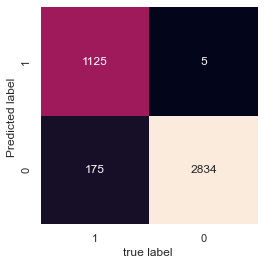

In [181]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("true label ")
plt.ylabel("Predicted label ")